<a href="https://colab.research.google.com/github/wolfinwallst/Machine_Learning_Deep_basis/blob/main/A2C_DQN_Portfolio_Optimization_test_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# 미국 달러/원 환율 데이터 다운로드
exchange_rate_data = yf.download('KRW=X', start='2007-03-30', end='2019-12-31', interval='1mo')['Close']

# 입력 데이터 다운로드, 미국채 10년물, 2년물, 물가연동채, 유가, 금 가격, 미국 주식시장 지수, 일본/EU  주식시장 지수, 변동성 지수
tickers = ['IEF', 'SHY', 'TIPS', 'CL=F', 'GC=F', '^GSPC', '^N225', '^STOXX50E', '^VIX']
input_data = yf.download(tickers, start='2007-03-30', end='2019-12-31', interval='1mo').dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  9 of 9 completed


In [ ]:
exchange_rate_data.dropna(inplace=True)
input_data.dropna(inplace=True)

# 데이터를 하나의 데이터프레임으로 병합
data = pd.concat([exchange_rate_data, input_data['Close']], axis=1).dropna()
data.columns = ['ExchangeRate', 'IEF', 'SHY', 'TIPS', 'CrudeOil', 'Gold', 'SP500', 'Nikkei', 'EuroStoxx', 'VIX']

# 환율 방향 열 추가 (1: 다음날 상승, -1: 하락)
data['Direction'] = np.where(data['ExchangeRate'].shift(-1) > data['ExchangeRate'], 1, -1)

In [ ]:
data

,ExchangeRate,IEF,SHY,TIPS,CrudeOil,Gold,SP500,Nikkei,EuroStoxx,VIX,Direction
Date,,,,,,,,,,,
2007-05-01,931.409973,64.010002,661.000000,53.126198,60.678627,0.0001,1530.619995,17875.750000,4512.649902,13.050000,-1
2007-06-01,903.039978,70.680000,648.099976,52.864479,60.963673,0.0001,1503.349976,18138.359375,4489.770020,16.230000,1
2007-08-01,937.099976,74.040001,673.000000,55.287727,62.151398,0.0001,1473.989990,16569.089844,4294.560059,23.379999,-1
2007-09-01,910.969971,81.660004,742.799988,55.332535,62.492825,0.0050,1526.750000,16785.689453,4381.709961,18.000000,-1
2007-10-01,898.690002,94.529999,792.000000,55.943848,62.798958,0.0001,1549.380005,16737.630859,4489.790039,18.530001,1
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,1155.510010,58.470001,1409.699951,97.714058,75.855026,0.0001,2941.760010,21275.919922,3473.689941,15.080000,1
2019-07-01,1180.650024,58.580002,1426.099976,97.772049,75.818687,0.0001,2980.379883,21521.529297,3466.850098,16.120001,1
2019-08-01,1207.160034,55.099998,1519.099976,101.633568,76.416512,0.0001,2926.459961,20704.369141,3426.760010,18.980000,-1


In [ ]:
# 입력 특성과 클래스 레이블을 나눕니다
X = data.drop(columns=['ExchangeRate', 'Direction'])
y = data['Direction']

# 데이터를 학습 및 테스트 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')

모델 정확도: 46.15%


In [ ]:
from sklearn.model_selection import GridSearchCV

# SVM 모델에 대한 그리드 서치를 수행할 매개변수 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# 그리드 서치를 초기화
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 학습 데이터에 적용
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 모델 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'최적 하이퍼파라미터: {best_params}')
print(grid_search.best_score_)

최적 하이퍼파라미터: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
0.5828571428571429


스코어가 소폭 상승했으나 여전히 낮다. 아마 다른 파라미터를 선택해야할 듯.

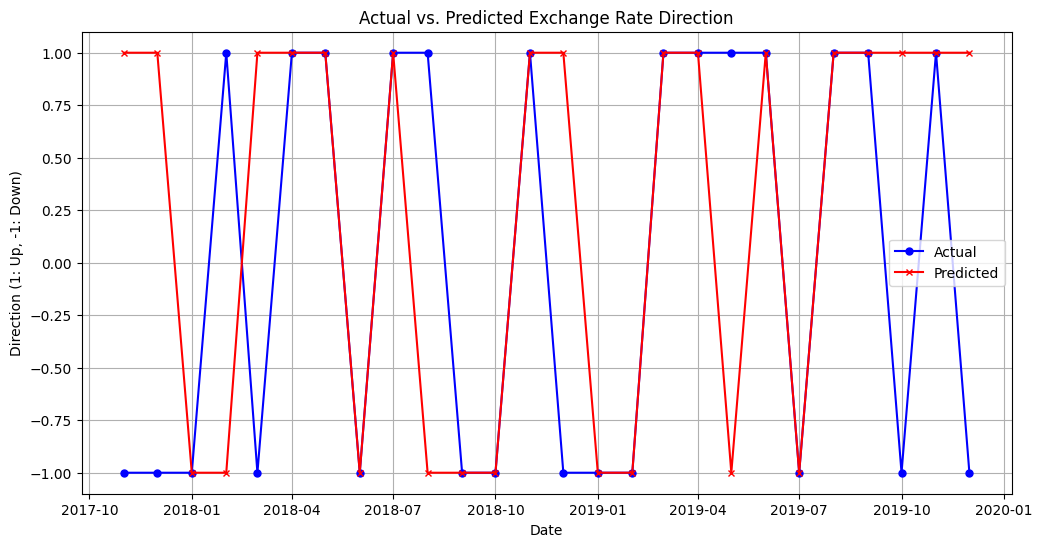

In [ ]:
# 테스트 셋과 환율 등락 예측 방향 비교
dates = pd.to_datetime(exchange_rate_data.index)
results = pd.DataFrame({'Actual': data['Direction'][-len(y_test):].values, 'Predicted': y_pred}, index=dates[-len(y_test):])
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual', marker='o', markersize=5, color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x', markersize=5, color='red')
plt.title('Actual vs. Predicted Exchange Rate Direction')
plt.xlabel('Date')
plt.ylabel('Direction (1: Up, -1: Down)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 미국 달러/원 환율 데이터 다운로드
exchange_rate_data = yf.download('KRW=X', start='2007-03-30', end='2019-12-31', interval='1mo')['Adj Close']

# 입력 데이터 다운로드, 미국채 10년물, 2년물, 물가연동채, 유가, 금 가격, 미국 주식시장 지수, 일본/EU  주식시장 지수, 변동성 지수
tickers = ['IEF', 'SHY', 'TIPS', 'CL=F', 'GC=F', '^GSPC', '^N225', '^STOXX50E', '^VIX']
input_data = yf.download(tickers, start='2007-03-30', end='2019-12-31', interval='1mo').dropna()

exchange_rate_data.dropna(inplace=True)
input_data.dropna(inplace=True)

# 데이터를 하나의 데이터프레임으로 병합
data = pd.concat([exchange_rate_data, input_data['Adj Close']], axis=1).dropna()
data.columns = ['ExchangeRate', 'IEF', 'SHY', 'TIPS', 'CrudeOil', 'Gold', 'SP500', 'Nikkei', 'EuroStoxx', 'VIX']

# 환율 방향 열 추가 (1: 다음날 상승, -1: 하락)
data['Direction'] = np.where(data['ExchangeRate'].shift(-1) > data['ExchangeRate'], 1, -1)

# 입력 특성과 클래스 레이블을 나눕니다
X = data.drop(columns=['ExchangeRate', 'Direction'])
y = data['Direction']

# 데이터를 학습 및 테스트 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100:.2f}%')

from sklearn.model_selection import GridSearchCV

# SVM 모델에 대한 그리드 서치를 수행할 매개변수 그리드 정의
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# 그리드 서치를 초기화
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 학습 데이터에 적용
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 모델 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'최적 하이퍼파라미터: {best_params}')
print(grid_search.best_score_)

# 테스트 셋과 환율 등락 예측 방향 비교
dates = pd.to_datetime(exchange_rate_data.index)
results = pd.DataFrame({'Actual': data['Direction'][-len(y_test):].values, 'Predicted': y_pred}, index=dates[-len(y_test):])
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual', marker='o', markersize=5, color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x', markersize=5, color='red')
plt.title('Actual vs. Predicted Exchange Rate Direction')
plt.xlabel('Date')
plt.ylabel('Direction (1: Up, -1: Down)')
plt.legend(loc='best')
plt.grid(True)
plt.show()



[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  9 of 9 completed


SVM Accuracy: 46.15%
Logistic Regression Accuracy: 42.31%
Decision Tree Accuracy: 65.38%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 57.69%


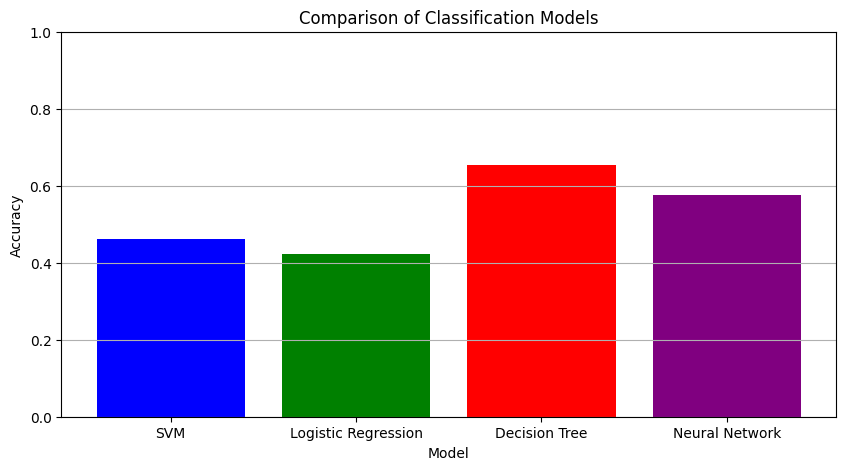

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 데이터 다운로드
exchange_rate_data = yf.download('KRW=X', start='2007-03-30', end='2019-12-31', interval='1mo')['Close']
tickers = ['IEF', 'SHY', 'TIPS', 'CL=F', 'GC=F', '^GSPC', '^N225', '^STOXX50E', '^VIX']
input_data = yf.download(tickers, start='2007-03-30', end='2019-12-31', interval='1mo').dropna()

exchange_rate_data.dropna(inplace=True)
input_data.dropna(inplace=True)

# 데이터 병합
data = pd.concat([exchange_rate_data, input_data['Close']], axis=1).dropna()
data.columns = ['ExchangeRate', 'IEF', 'SHY', 'TIPS', 'CrudeOil', 'Gold', 'SP500', 'Nikkei', 'EuroStoxx', 'VIX']
data['Direction'] = np.where(data['ExchangeRate'].shift(-1) > data['ExchangeRate'], 1, -1)

# 입력/출력 분리
X = data.drop(columns=['ExchangeRate', 'Direction'])
y = data['Direction']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 정의
models = {
    'SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

# 성능 비교 시각화
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [ ]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.9 MB/s eta 0:00:00


In [ ]:
from PyWavelets import pywt

ModuleNotFoundError: No module named 'PyWavelets'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  9 of 9 completed


원본 데이터 SVM 정확도: 46.15%
Denoised 데이터 SVM 정확도: 42.31%


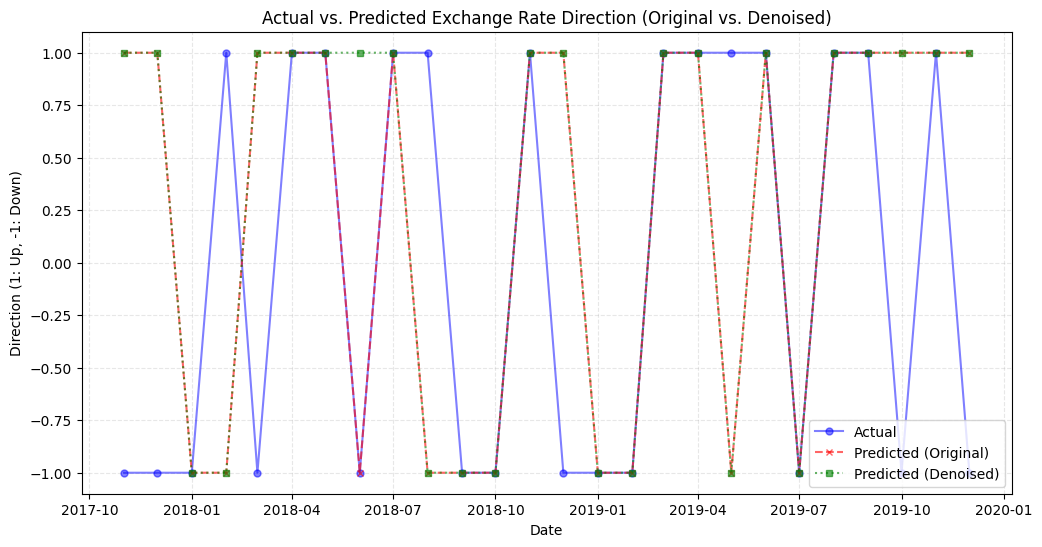

In [ ]:
# wavelet transform으로 denoising한 것도 비교해보자
import yfinance as yf
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 환율 및 금융 데이터 다운로드
exchange_rate_data = yf.download('USDKRW=X', start='2007-03-30', end='2019-12-31', interval='1mo')['Close']

tickers = ['IEF', 'SHY', 'TIPS', 'CL=F', 'GC=F', '^GSPC', '^N225', '^STOXX50E', '^VIX']
input_data = yf.download(tickers, start='2007-03-30', end='2019-12-31', interval='1mo')['Close'].dropna()

exchange_rate_data.dropna(inplace=True)
input_data.dropna(inplace=True)

# 데이터를 병합
data = pd.concat([exchange_rate_data, input_data], axis=1).dropna()
data.columns = ['ExchangeRate'] + tickers

# 방향 라벨 추가 (1: 상승, -1: 하락)
data['Direction'] = np.where(data['ExchangeRate'].shift(-1) > data['ExchangeRate'], 1, -1)

# 원본 데이터 준비
X = data.drop(columns=['ExchangeRate', 'Direction'])
y = data['Direction']

# --------------------- Wavelet Transform을 적용한 denoising ---------------------
def wavelet_denoising(signal, wavelet='db4', level=1):
    coeffs = pywt.wavedec(signal, wavelet, mode='per')
    coeffs[1:] = [pywt.threshold(c, np.std(c), mode='soft') for c in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet, mode='per')[:len(signal)]

input_data_smooth = X.apply(lambda x: wavelet_denoising(x.values) if x.name in X.columns else x)

# --------------------- SVM 학습 및 평가 (원본 데이터) ---------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred)

# --------------------- SVM 학습 및 평가 (Denoised 데이터) ---------------------
X_train_smooth, X_test_smooth, y_train_smooth, y_test_smooth = train_test_split(input_data_smooth, y, test_size=0.2, random_state=42)

scaler_smooth = StandardScaler()
X_train_smooth_scaled = scaler_smooth.fit_transform(X_train_smooth)
X_test_smooth_scaled = scaler_smooth.transform(X_test_smooth)

svm_model_smooth = SVC(kernel='linear', C=1.0, random_state=42)
svm_model_smooth.fit(X_train_smooth_scaled, y_train_smooth)
y_pred_smooth = svm_model_smooth.predict(X_test_smooth_scaled)
accuracy_smooth = accuracy_score(y_test_smooth, y_pred_smooth)

# --------------------- 결과 출력 및 시각화 ---------------------
print(f'원본 데이터 SVM 정확도: {accuracy_original * 100:.2f}%')
print(f'Denoised 데이터 SVM 정확도: {accuracy_smooth * 100:.2f}%')

# 예측 결과 비교 Plot
dates = pd.to_datetime(exchange_rate_data.index)
results_original = pd.DataFrame({'Actual': data['Direction'][-len(y_test):].values, 'Predicted': y_pred}, index=dates[-len(y_test):])
results_smooth = pd.DataFrame({'Actual': data['Direction'][-len(y_test_smooth):].values, 'Predicted': y_pred_smooth}, index=dates[-len(y_test_smooth):])

plt.figure(figsize=(12, 6))
plt.plot(results_original.index, results_original['Actual'], label='Actual', marker='o', markersize=5, color='blue', alpha=0.5, linewidth=1.5)
plt.plot(results_original.index, results_original['Predicted'], label='Predicted (Original)', marker='x', markersize=5, color='red', alpha=0.6, linestyle='dashed', linewidth=1.5)
plt.plot(results_smooth.index, results_smooth['Predicted'], label='Predicted (Denoised)', marker='s', markersize=5, color='green', alpha=0.6, linestyle='dotted', linewidth=1.5)
plt.title('Actual vs. Predicted Exchange Rate Direction (Original vs. Denoised)')
plt.xlabel('Date')
plt.ylabel('Direction (1: Up, -1: Down)')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

TypeError: Legend.__init__() got an unexpected keyword argument 'alpha'

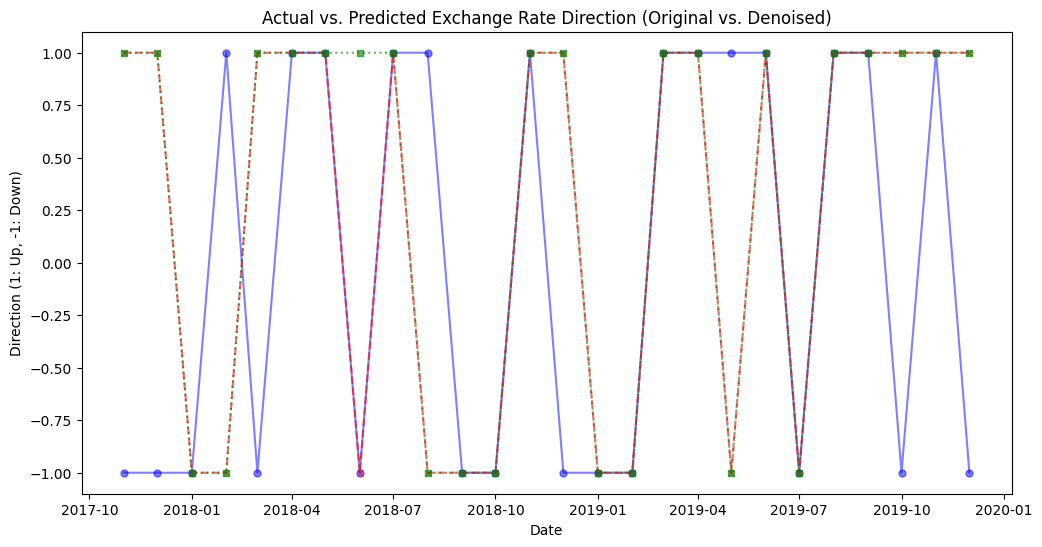

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(results_original.index, results_original['Actual'], label='Actual', marker='o', markersize=5, color='blue', alpha=0.5, linewidth=1.5)
plt.plot(results_original.index, results_original['Predicted'], label='Predicted (Original)', marker='x', markersize=5, color='red', alpha=0.6, linestyle='dashed', linewidth=1.5)
plt.plot(results_smooth.index, results_smooth['Predicted'], label='Predicted (Denoised)', marker='s', markersize=5, color='green', alpha=0.6, linestyle='dotted', linewidth=1.5)
plt.title('Actual vs. Predicted Exchange Rate Direction (Original vs. Denoised)')
plt.xlabel('Date')
plt.ylabel('Direction (1: Up, -1: Down)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random

# Hyperparameters
GAMMA = 0.99
LR = 1e-4
EPS_CLIP = 0.2
BATCH_SIZE = 32
EPOCHS = 10

class PolicyNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

class PPOAgent:
    def __init__(self, state_dim, action_dim):
        self.policy_net = PolicyNetwork(state_dim, action_dim)
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=LR)
        self.memory = deque(maxlen=10000)

    def select_action(self, state):
        state = torch.FloatTensor(state)
        with torch.no_grad():
            action_probs = self.policy_net(state)
        action = np.random.choice(len(action_probs), p=action_probs.numpy())
        return action, action_probs[action]

    def store_transition(self, transition):
        self.memory.append(transition)

    def train(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)

        old_probs = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()

        for _ in range(EPOCHS):
            new_probs = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
            ratio = new_probs / old_probs

            advantages = rewards + GAMMA * (1 - dones) - rewards
            surr1 = ratio * advantages
            surr2 = torch.clamp(ratio, 1 - EPS_CLIP, 1 + EPS_CLIP) * advantages
            loss = -torch.min(surr1, surr2).mean()

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

# Example usage
state_dim = 10  # Number of asset features
action_dim = 3  # Number of asset classes
agent = PPOAgent(state_dim, action_dim)

# Simulated state input (portfolio feature vector)
state = np.random.rand(state_dim)
action, prob = agent.select_action(state)
print(f"Selected Action: {action}, Probability: {prob}")

Selected Action: 1, Probability: 0.3400707542896271


[*********************100%***********************]  7 of 7 completed


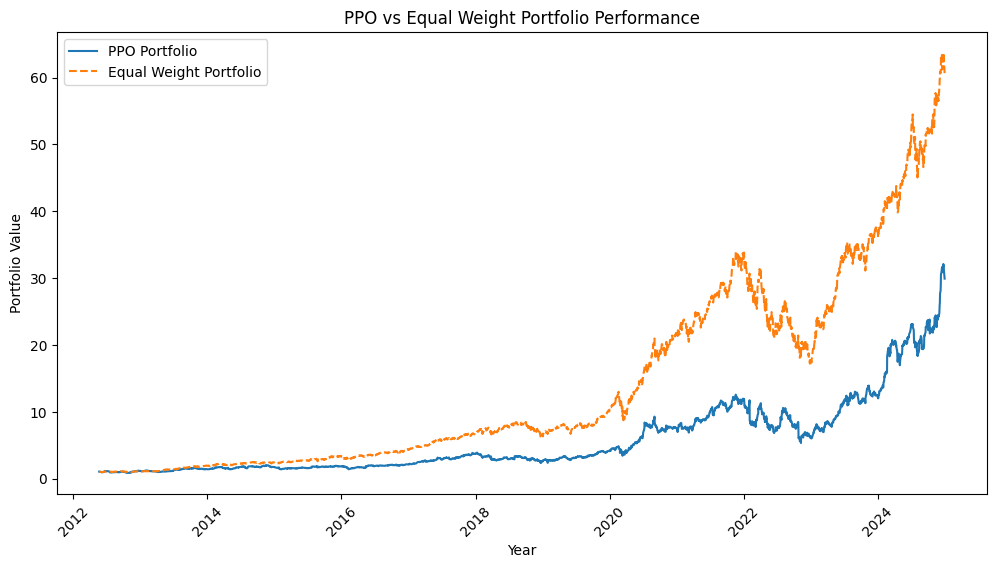

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from collections import deque
import random

# Hyperparameters
GAMMA = 0.99
LR = 1e-4
EPS_CLIP = 0.2
BATCH_SIZE = 32
EPOCHS = 10

# Download M7 stock data
M7_TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA']
data = yf.download(M7_TICKERS, start='2000-01-01', end='2025-01-01')['Close']
returns = data.pct_change().dropna()
n_assets = returns.shape[1]

dates = returns.index

class PolicyNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

class PPOAgent:
    def __init__(self, state_dim, action_dim):
        self.policy_net = PolicyNetwork(state_dim, action_dim)
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=LR)
        self.memory = deque(maxlen=10000)

    def select_action(self, state):
        state = torch.FloatTensor(state)
        with torch.no_grad():
            action_probs = self.policy_net(state)
        action = np.random.choice(len(action_probs), p=action_probs.numpy())
        return action, action_probs[action]

    def store_transition(self, transition):
        self.memory.append(transition)

    def train(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)

        old_probs = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()

        for _ in range(EPOCHS):
            new_probs = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
            ratio = new_probs / old_probs

            advantages = rewards + GAMMA * (1 - dones) - rewards
            surr1 = ratio * advantages
            surr2 = torch.clamp(ratio, 1 - EPS_CLIP, 1 + EPS_CLIP) * advantages
            loss = -torch.min(surr1, surr2).mean()

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

# Train and backtest PPO on M7 stocks
state_dim = n_assets
action_dim = n_assets
agent = PPOAgent(state_dim, action_dim)
portfolio_values = [1.0]  # Initial portfolio value

def backtest(agent, returns):
    portfolio_weights = np.ones(n_assets) / n_assets  # Start with equal weights
    for i in range(len(returns)):
        state = returns.iloc[i].values
        action, _ = agent.select_action(state)
        portfolio_weights = np.eye(n_assets)[action]  # One-hot encoding for simplicity
        daily_return = np.dot(portfolio_weights, returns.iloc[i])
        portfolio_values.append(portfolio_values[-1] * (1 + daily_return))

backtest(agent, returns)

# Benchmark: Equal weight portfolio
equal_weight_values = [1.0]
weights = np.ones(n_assets) / n_assets
for i in range(len(returns)):
    daily_return = np.dot(weights, returns.iloc[i])
    equal_weight_values.append(equal_weight_values[-1] * (1 + daily_return))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(dates, portfolio_values[1:], label='PPO Portfolio')
plt.plot(dates, equal_weight_values[1:], label='Equal Weight Portfolio', linestyle='--')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.title('PPO vs Equal Weight Portfolio Performance')
plt.xticks(rotation=45)
plt.show()

[*********************100%***********************]  7 of 7 completed


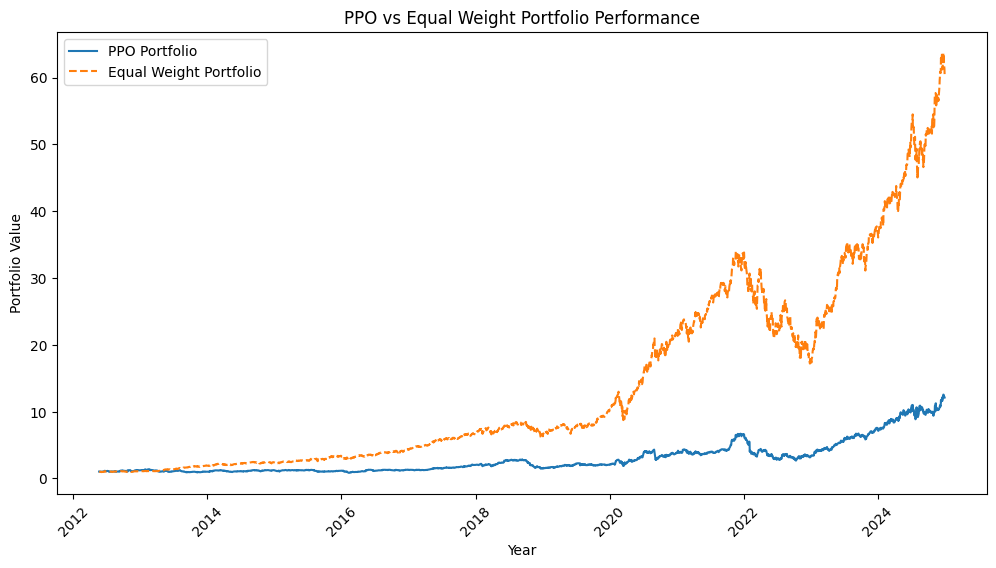

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from collections import deque
import random

# Hyperparameters
GAMMA = 0.99
LR = 1e-4
EPS_CLIP = 0.2
BATCH_SIZE = 32
EPOCHS = 10

# Download stock data
TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA']
data = yf.download(TICKERS, start='2000-01-01', end='2025-01-01')['Close']
returns = data.pct_change().dropna()
n_assets = returns.shape[1]
dates = returns.index

class PolicyNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

class PPOAgent:
    def __init__(self, state_dim, action_dim):
        self.policy_net = PolicyNetwork(state_dim, action_dim)
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=LR)
        self.memory = deque(maxlen=10000)

    def select_action(self, state):
        state = torch.FloatTensor(state)
        with torch.no_grad():
            action_probs = self.policy_net(state)
        action = np.random.choice(len(action_probs), p=action_probs.numpy())
        return action, action_probs[action]

    def store_transition(self, transition):
        self.memory.append(transition)

    def train(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)

        old_probs = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()

        for _ in range(EPOCHS):
            new_probs = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
            ratio = new_probs / old_probs

            advantages = rewards + GAMMA * (1 - dones) - rewards
            surr1 = ratio * advantages
            surr2 = torch.clamp(ratio, 1 - EPS_CLIP, 1 + EPS_CLIP) * advantages
            loss = -torch.min(surr1, surr2).mean()

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

# Train and backtest PPO on selected stocks
state_dim = n_assets
action_dim = n_assets
agent = PPOAgent(state_dim, action_dim)
portfolio_values = [1.0]  # Initial portfolio value

def backtest(agent, returns):
    portfolio_weights = np.ones(n_assets) / n_assets  # Start with equal weights
    for i in range(len(returns)):
        state = returns.iloc[i].values
        action, _ = agent.select_action(state)
        portfolio_weights = np.eye(n_assets)[action]  # One-hot encoding for simplicity
        daily_return = np.dot(portfolio_weights, returns.iloc[i])
        portfolio_values.append(portfolio_values[-1] * (1 + daily_return))

backtest(agent, returns)

# Benchmark: Equal weight portfolio
equal_weight_values = [1.0]
weights = np.ones(n_assets) / n_assets
for i in range(len(returns)):
    daily_return = np.dot(weights, returns.iloc[i])
    equal_weight_values.append(equal_weight_values[-1] * (1 + daily_return))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(dates, portfolio_values[1:], label='PPO Portfolio')
plt.plot(dates, equal_weight_values[1:], label='Equal Weight Portfolio', linestyle='--')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.title('PPO vs Equal Weight Portfolio Performance')
plt.xticks(rotation=45)
plt.show()

>> 인코딩 단계: Bayesian Autoencoder 훈련 시작
[인코딩] Epoch 0, Total Loss: 118349.3047, Recon Loss: 116697.6094, KL Loss: 16516.9570
[인코딩] Epoch 50, Total Loss: 98891.4453, Recon Loss: 97240.2031, KL Loss: 16512.4473
[인코딩] Epoch 100, Total Loss: 91633.4531, Recon Loss: 89981.8594, KL Loss: 16515.9160
[인코딩] Epoch 150, Total Loss: 87537.6953, Recon Loss: 85884.8672, KL Loss: 16528.2910
[인코딩] Epoch 200, Total Loss: 85294.1328, Recon Loss: 83639.4375, KL Loss: 16546.9785
[인코딩] Epoch 250, Total Loss: 83895.1719, Recon Loss: 82238.1484, KL Loss: 16570.2383
[인코딩] Epoch 300, Total Loss: 82751.8125, Recon Loss: 81092.1953, KL Loss: 16596.1641
[인코딩] Epoch 350, Total Loss: 81819.5156, Recon Loss: 80157.0156, KL Loss: 16624.9980
[인코딩] Epoch 400, Total Loss: 81109.3984, Recon Loss: 79443.8125, KL Loss: 16655.8633
[인코딩] Epoch 450, Total Loss: 80431.7812, Recon Loss: 78762.9141, KL Loss: 16688.6484

>> 캘리브레이션 단계: Portfolio Mapping 네트워크 훈련 시작
[캘리브레이션] Epoch 0, Loss: 1320.3641, Calib Loss: 1312.1667, KL Loss: 81

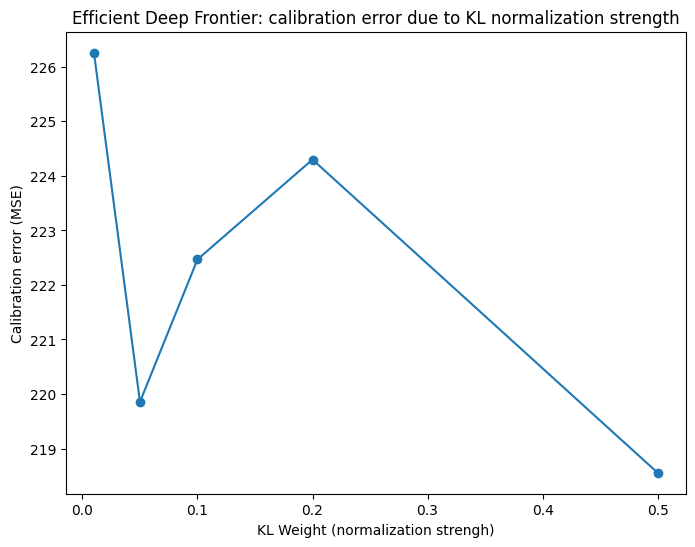

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Bayesian Linear Layer 구현
class BayesianLinear(nn.Module):
    def __init__(self, in_features, out_features, prior_mu=0.0, prior_sigma=1.0):
        super(BayesianLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features

        # Variational parameters for weights
        self.weight_mu = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-0.2, 0.2))
        self.weight_rho = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-5, -4))
        # Variational parameters for biases
        self.bias_mu = nn.Parameter(torch.Tensor(out_features).uniform_(-0.2, 0.2))
        self.bias_rho = nn.Parameter(torch.Tensor(out_features).uniform_(-5, -4))

        self.prior_mu = prior_mu
        self.prior_sigma = prior_sigma

    def forward(self, input):
        epsilon_w = torch.randn_like(self.weight_rho)
        epsilon_b = torch.randn_like(self.bias_rho)
        weight_sigma = F.softplus(self.weight_rho)
        bias_sigma = F.softplus(self.bias_rho)
        weight = self.weight_mu + weight_sigma * epsilon_w
        bias = self.bias_mu + bias_sigma * epsilon_b
        return F.linear(input, weight, bias)

    def kl_loss(self):
        weight_sigma = F.softplus(self.weight_rho)
        bias_sigma = F.softplus(self.bias_rho)
        kl_weight = torch.sum(torch.log(self.prior_sigma / weight_sigma) +
                              (weight_sigma**2 + (self.weight_mu - self.prior_mu)**2) / (2 * self.prior_sigma**2) - 0.5)
        kl_bias = torch.sum(torch.log(self.prior_sigma / bias_sigma) +
                              (bias_sigma**2 + (self.bias_mu - self.prior_mu)**2) / (2 * self.prior_sigma**2) - 0.5)
        return kl_weight + kl_bias

# Step 1: 인코딩 – Bayesian Autoencoder 정의 (시장 데이터를 인코딩)
class BayesianAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(BayesianAutoencoder, self).__init__()
        self.encoder = BayesianLinear(input_dim, latent_dim)
        self.decoder = BayesianLinear(latent_dim, input_dim)

    def forward(self, x):
        z = F.relu(self.encoder(x))  # 인코딩 + 활성화
        x_recon = self.decoder(z)      # 디코딩
        return x_recon, z

    def kl_loss(self):
        return self.encoder.kl_loss() + self.decoder.kl_loss()

# Step 2: 캘리브레이션 – 포트폴리오 맵핑 네트워크 (인코딩된 latent 표현으로 목표 Y 예측)
class PortfolioMapping(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(PortfolioMapping, self).__init__()
        # 단순 Bayesian Linear mapping (확장 가능)
        self.mapping = BayesianLinear(latent_dim, output_dim)

    def forward(self, z):
        return self.mapping(z)

    def kl_loss(self):
        return self.mapping.kl_loss()

# 데이터 생성: 여기서는 예시를 위한 합성 데이터 사용 (시장 데이터 X와 목표 Y)
def generate_synthetic_data(num_samples, num_assets):
    # X: 시장 수익률 데이터 (예: 각 자산의 주간 수익률)
    X = torch.randn(num_samples, num_assets)
    # Y: 목표 수익률, 예를 들어 전체 자산 수익률의 비선형 합성 (여기서는 tanh(sum) 사용)
    Y = torch.tanh(torch.sum(X, dim=1, keepdim=True))
    return X, Y

# 인코딩 단계 학습: Autoencoder 훈련
def train_autoencoder(model, data, num_epochs=500, lr=1e-3, kl_weight=0.1):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        x_recon, _ = model(data)
        recon_loss = F.mse_loss(x_recon, data, reduction='sum')
        kl_loss = model.kl_loss()
        loss = recon_loss + kl_weight * kl_loss
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 50 == 0:
            print(f"[인코딩] Epoch {epoch}, Total Loss: {loss.item():.4f}, Recon Loss: {recon_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}")
    return losses

# 캘리브레이션 단계 학습: Portfolio Mapping 네트워크 훈련 (인코더 고정)
def train_portfolio_mapping(autoencoder, mapping_model, data, target, num_epochs=500, lr=1e-3, kl_weight=0.1):
    autoencoder.eval()  # 인코더 고정
    optimizer = optim.Adam(mapping_model.parameters(), lr=lr)
    losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        with torch.no_grad():
            _, z = autoencoder(data)
        y_pred = mapping_model(z)
        calib_loss = F.mse_loss(y_pred, target, reduction='sum')
        kl_loss = mapping_model.kl_loss()
        loss = calib_loss + kl_weight * kl_loss
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 50 == 0:
            print(f"[캘리브레이션] Epoch {epoch}, Loss: {loss.item():.4f}, Calib Loss: {calib_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}")
    return losses

# 검증: 검증 데이터셋에서 인코딩 재구성오차와 캘리브레이션 오차 계산
def validate(autoencoder, mapping_model, data, target, kl_weight=0.1):
    autoencoder.eval()
    mapping_model.eval()
    with torch.no_grad():
        x_recon, z = autoencoder(data)
        recon_loss = F.mse_loss(x_recon, data, reduction='sum').item()
        calib_loss = F.mse_loss(mapping_model(z), target, reduction='sum').item()
        total_loss = recon_loss + kl_weight * (autoencoder.kl_loss().item() + mapping_model.kl_loss().item()) + calib_loss
    return recon_loss, calib_loss, total_loss

# 검토: KL 정규화 계수(kl_weight)를 변화시키며 검증 데이터에서의 성능(효율적 deep frontier)을 확인
def verify(autoencoder, mapping_model, val_data, val_target, kl_weight_values):
    recon_errors = []
    calib_errors = []
    total_errors = []
    for kw in kl_weight_values:
        r, c, t = validate(autoencoder, mapping_model, val_data, val_target, kl_weight=kw)
        recon_errors.append(r)
        calib_errors.append(c)
        total_errors.append(t)
    plt.figure(figsize=(8,6))
    plt.plot(kl_weight_values, calib_errors, marker='o')
    # plt.xlabel("KL Weight (정규화 강도)")
    # plt.ylabel("캘리브레이션 오차 (MSE)")
    # plt.title("효율적 Deep Frontier: KL 정규화 강도에 따른 캘리브레이션 오차")
    plt.xlabel("KL Weight (normalization strength)")
    plt.ylabel("Calibration error (MSE)")
    plt.title("Efficient Deep Frontier: calibration error due to KL normalization strength")
    plt.show()
    return recon_errors, calib_errors, total_errors

# 전체 4단계 파이프라인 실행
def main():
    # 데이터 준비 (합성 데이터 사용)
    num_train = 1000
    num_val = 300
    num_assets = 100    # 시장 데이터 차원 (자산 수)
    latent_dim = 20     # Bottleneck 차원 (deep factor 수)
    output_dim = 1      # 목표: 포트폴리오 수익률 (scalar)

    X_train, Y_train = generate_synthetic_data(num_train, num_assets)
    X_val, Y_val = generate_synthetic_data(num_val, num_assets)

    # Step 1: 인코딩 (Autoencoder 훈련)
    autoencoder = BayesianAutoencoder(input_dim=num_assets, latent_dim=latent_dim)
    print(">> 인코딩 단계: Bayesian Autoencoder 훈련 시작")
    train_autoencoder(autoencoder, X_train, num_epochs=500, lr=1e-3, kl_weight=0.1)

    # Step 2: 캘리브레이션 (Portfolio Mapping 훈련)
    mapping_model = PortfolioMapping(latent_dim=latent_dim, output_dim=output_dim)
    print("\n>> 캘리브레이션 단계: Portfolio Mapping 네트워크 훈련 시작")
    train_portfolio_mapping(autoencoder, mapping_model, X_train, Y_train, num_epochs=500, lr=1e-3, kl_weight=0.1)

    # Step 3: 검증 (Validation)
    recon_err, calib_err, total_err = validate(autoencoder, mapping_model, X_val, Y_val, kl_weight=0.1)
    print(f"\n[검증 결과] 재구성 오차: {recon_err:.4f}, 캘리브레이션 오차: {calib_err:.4f}, 총 오차: {total_err:.4f}")

    # Step 4: 검토 (Verification) – KL 정규화 강도 변화에 따른 검증 성능 확인
    kl_weight_values = [0.01, 0.05, 0.1, 0.2, 0.5]
    print("\n>> 검토 단계: 다양한 KL 정규화 강도에 따른 효율적 deep frontier 확인")
    verify(autoencoder, mapping_model, X_val, Y_val, kl_weight_values)

if __name__ == "__main__":
    main()


In [ ]:
pip install stable_baselines3

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
pip install shimmy

[*********************100%***********************]  20 of 20 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 119      |
|    ep_rew_mean     | 1.97     |
| time/              |          |
|    fps             | 170      |
|    iterations      | 1        |
|    time_elapsed    | 11       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 119         |
|    ep_rew_mean          | 1.96        |
| time/                   |             |
|    fps                  | 150         |
|    iterations           | 2           |
|    time_elapsed         | 27          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009823873 |
|    clip_fraction        | 0.0997      |
|    clip_range           | 0.2         |
|    entropy_loss   

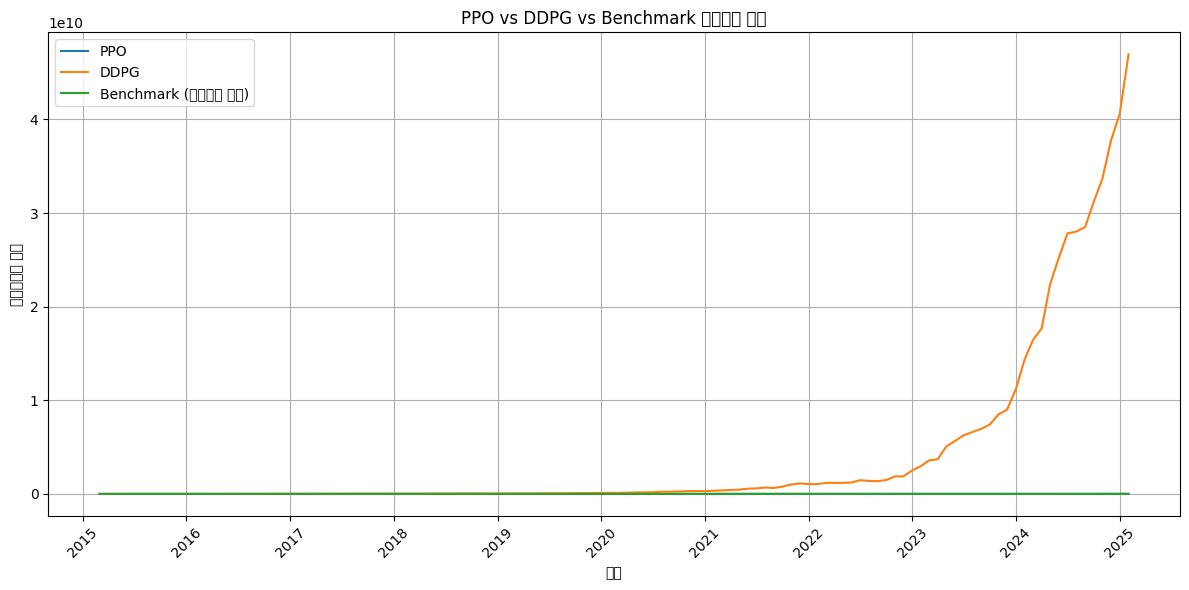

In [ ]:
# ---------------------------
# 1. 라이브러리 임포트
# ---------------------------
import numpy as np
import pandas as pd
import yfinance as yf
import gym
from gym import spaces
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from stable_baselines3 import PPO
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# 2. 데이터 다운로드 및 전처리
# ---------------------------
# S&P500 상위 20종목 (예시 티커, 실제 운용 시 최신 리스트로 수정)
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "NVDA", "META", "BRK-B", "UNH",
           "JNJ", "V", "PG", "MA", "HD", "DIS", "BAC", "VZ", "ADBE", "CMCSA", "NFLX", "PFE"]

# 10년간 월별 Adjusted Close 데이터 다운로드 (시작일과 종료일은 예시)
price_data = yf.download(tickers, start="2015-02-14", end="2025-02-14", interval="1mo")["Close"]
price_data.dropna(inplace=True)  # 결측치 제거

# ---------------------------
# 3. 매크로 데이터 시뮬레이션
# ---------------------------
# 실제 매크로 데이터 대신 GDP, 인플레이션, 금리 3개 지표를 월별로 시뮬레이션
np.random.seed(42)
macro_index = price_data.index
n_periods = len(macro_index)
# GDP: 약간 상승하는 추세 + 노이즈, 인플레이션: 2% 주변 변동, 금리: 1~5% 범위
gdp = np.linspace(100, 150, n_periods) + np.random.normal(0, 2, n_periods)
inflation = 2 + np.random.normal(0, 0.3, n_periods)
interest_rate = 3 + np.random.normal(0, 0.5, n_periods)
macro_data = pd.DataFrame({'GDP': gdp, 'Inflation': inflation, 'Interest': interest_rate}, index=macro_index)

# ---------------------------
# 4. LSTM 기반 매크로 특징 추출 네트워크
# ---------------------------
class MacroLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        """
        매크로 데이터를 입력받아 특징을 추출하는 LSTM 네트워크
        input_dim: 입력 차원 (매크로 지표 수)
        hidden_dim: LSTM hidden state 차원
        num_layers: LSTM 레이어 수
        output_dim: 최종 출력 차원 (추출할 특징 벡터 크기)
        """
        super(MacroLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x: (batch, seq_len, input_dim)
        out, _ = self.lstm(x)
        # 마지막 시점의 hidden state 사용
        out = self.fc(out[:, -1, :])
        return out

# 매크로 LSTM 인스턴스 생성 (입력:3, hidden:16, 레이어:1, 출력:2)
macro_window = 3  # 최근 3개월 데이터를 이용
macro_lstm = MacroLSTM(input_dim=3, hidden_dim=16, num_layers=1, output_dim=2)
# 본 예제에서는 별도 학습 없이 랜덤 초기화 상태를 사용 (실제 운용 시 학습 필요)
macro_lstm.eval()  # 평가모드로 전환

# ---------------------------
# 5. 포트폴리오 환경(PortfolioEnv) 구현
# ---------------------------
class PortfolioEnv(gym.Env):
    def __init__(self, price_data, macro_data, macro_lstm, macro_window=3):
        """
        price_data: 각 자산의 월별 가격 (DataFrame)
        macro_data: 매크로 데이터 (DataFrame, price_data와 인덱스 동일)
        macro_lstm: 매크로 특징 추출에 사용할 LSTM 네트워크
        macro_window: LSTM에 투입할 시계열 길이 (개월 수)
        """
        super(PortfolioEnv, self).__init__()
        self.price_data = price_data.reset_index(drop=True)
        self.macro_data = macro_data.reset_index(drop=True)
        self.macro_lstm = macro_lstm  # 미리 초기화된 LSTM 네트워크
        self.macro_window = macro_window
        self.n_assets = price_data.shape[1]
        # 상태: 자산 수익률 (n_assets) + 매크로 특징 (2)
        self.state_dim = self.n_assets + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.state_dim,), dtype=np.float32)
        # 액션: 각 자산에 배분할 비중 (0~1, 총합 1)
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)

        self.initial_investment = 1e6  # 초기 투자금
        self.reset()

    def _get_macro_feature(self, idx):
        """
        현재 시점 idx에 대해 최근 macro_window 개월의 매크로 데이터를 LSTM에 투입하여 특징 벡터 추출
        """
        if idx < self.macro_window:
            # 윈도우보다 적은 경우 앞쪽을 0으로 패딩
            pad = np.zeros((self.macro_window - idx, self.macro_data.shape[1]))
            seq = np.vstack([pad, self.macro_data.iloc[0:idx].values])
        else:
            seq = self.macro_data.iloc[idx - self.macro_window: idx].values
        # seq shape: (window, n_macro)
        seq = torch.FloatTensor(seq).unsqueeze(0)  # (1, window, n_macro)
        with torch.no_grad():
            feature = self.macro_lstm(seq).squeeze(0).numpy()  # (output_dim,)
        return feature

    def _get_asset_return(self, idx):
        """
        idx: 현재 시점 (월) 인덱스 (idx>=1)
        이전 달 대비 자산 수익률 (비율, 예: (P_t / P_{t-1} - 1)) 계산
        """
        prev_prices = self.price_data.iloc[idx - 1].values.astype(np.float32)
        current_prices = self.price_data.iloc[idx].values.astype(np.float32)
        returns = (current_prices / prev_prices) - 1.0
        return returns  # (n_assets,)

    def reset(self):
        self.current_step = 1  # 0은 초기값으로 사용
        self.portfolio_value = self.initial_investment
        # 초기 상태: 자산 수익률은 0 (아직 변화 없음), 매크로 특징은 최근 3개월 데이터에서 추출 (idx=0)
        macro_feature = self._get_macro_feature(0)
        state = np.concatenate([np.zeros(self.n_assets), macro_feature])
        return state.astype(np.float32)

    def step(self, action):
        # 액션 정규화: 음수값 제거 후 합 1로 만들기
        weights = np.array(action)
        if weights.sum() == 0:
            weights = np.ones(self.n_assets) / self.n_assets
        else:
            weights = weights.clip(min=0)
            weights = weights / weights.sum()

        # 현재 시점의 자산 수익률 계산 (current_step >=1 보장)
        asset_return = self._get_asset_return(self.current_step)
        # 포트폴리오 수익률 계산 (가중합)
        portfolio_return = np.dot(weights, (1 + asset_return))
        # 포트폴리오 가치 업데이트
        self.portfolio_value *= portfolio_return
        # 로그 수익률을 보상으로 사용
        reward = np.log(portfolio_return + 1e-8)

        self.current_step += 1
        done = self.current_step >= len(self.price_data)

        # 다음 상태 구성: 자산 수익률 + 매크로 특징
        if not done:
            next_asset_return = self._get_asset_return(self.current_step)
            macro_feature = self._get_macro_feature(self.current_step)
            state = np.concatenate([next_asset_return, macro_feature])
        else:
            state = np.zeros(self.state_dim)

        info = {'portfolio_value': self.portfolio_value}
        return state.astype(np.float32), reward, done, info

# ---------------------------
# 6. PPO를 활용한 자산배분 – 학습 및 평가
# ---------------------------
# PPO용 환경 생성 (복제해서 사용)
env_ppo = PortfolioEnv(price_data, macro_data, macro_lstm, macro_window=macro_window)

# PPO 에이전트 생성 (MLP 정책 사용)
model_ppo = PPO("MlpPolicy", env_ppo, verbose=1)
# timesteps는 데모용으로 적은 값, 실제 적용 시 충분한 학습 필요
model_ppo.learn(total_timesteps=5000)

# PPO 정책으로 백테스트 실행
obs = env_ppo.reset()
ppo_values = [env_ppo.portfolio_value]
while True:
    action, _ = model_ppo.predict(obs)
    obs, reward, done, info = env_ppo.step(action)
    ppo_values.append(info['portfolio_value'])
    if done:
        break

# ---------------------------
# 7. DDPG를 활용한 자산배분 – 커스텀 구현
# ---------------------------
# Actor 네트워크 (상태 -> 액션)
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=64):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, action_dim)
        self.softmax = nn.Softmax(dim=-1)  # 출력 벡터를 확률분포(비중)로 변환

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        action = self.softmax(x)
        return action

# Critic 네트워크 (상태, 액션 -> Q-value)
class Critic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=64):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_dim + action_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 1)

    def forward(self, state, action):
        x = torch.cat([state, action], dim=1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        q_value = self.fc3(x)
        return q_value

# 간단한 Replay Buffer 구현
class ReplayBuffer:
    def __init__(self, max_size=100000):
        self.buffer = []
        self.max_size = max_size

    def add(self, transition):
        self.buffer.append(transition)
        if len(self.buffer) > self.max_size:
            self.buffer.pop(0)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        batch = [self.buffer[i] for i in indices]
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

    def size(self):
        return len(self.buffer)

# DDPG 에이전트 클래스
class DDPGAgent:
    def __init__(self, state_dim, action_dim, actor_lr=1e-3, critic_lr=1e-3,
                 gamma=0.99, tau=0.005, device='cpu'):
        self.device = device
        self.actor = Actor(state_dim, action_dim).to(self.device)
        self.critic = Critic(state_dim, action_dim).to(self.device)
        self.target_actor = Actor(state_dim, action_dim).to(self.device)
        self.target_critic = Critic(state_dim, action_dim).to(self.device)
        # 타깃 네트워크 초기화
        self.target_actor.load_state_dict(self.actor.state_dict())
        self.target_critic.load_state_dict(self.critic.state_dict())
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=critic_lr)
        self.gamma = gamma
        self.tau = tau
        self.replay_buffer = ReplayBuffer()

    def select_action(self, state, noise_scale=0.1):
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        self.actor.eval()
        with torch.no_grad():
            action = self.actor(state_tensor).cpu().data.numpy()[0]
        self.actor.train()
        # 탐사 노이즈 추가
        noise = noise_scale * np.random.randn(len(action))
        action = action + noise
        # 음수 처리 후 정규화
        action = np.clip(action, 0, None)
        if action.sum() == 0:
            action = np.ones_like(action) / len(action)
        else:
            action = action / action.sum()
        return action

    def update(self, batch_size=64):
        if self.replay_buffer.size() < batch_size:
            return
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(batch_size)
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.FloatTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).unsqueeze(1).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).unsqueeze(1).to(self.device)

        # Critic 업데이트
        with torch.no_grad():
            next_actions = self.target_actor(next_states)
            target_q = self.target_critic(next_states, next_actions)
            target_q = rewards + (1 - dones) * self.gamma * target_q
        current_q = self.critic(states, actions)
        critic_loss = nn.MSELoss()(current_q, target_q)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # Actor 업데이트 (정책 기울기 상승)
        actor_loss = -self.critic(states, self.actor(states)).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # 타깃 네트워크 부드럽게 업데이트
        for target_param, param in zip(self.target_actor.parameters(), self.actor.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
        for target_param, param in zip(self.target_critic.parameters(), self.critic.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

# DDPG용 환경 생성 (새 인스턴스로 초기화)
env_ddpg = PortfolioEnv(price_data, macro_data, macro_lstm, macro_window=macro_window)
state_dim = env_ddpg.observation_space.shape[0]
action_dim = env_ddpg.action_space.shape[0]
ddpg_agent = DDPGAgent(state_dim, action_dim, device='cpu')

# DDPG 학습: 에피소드 단위로 환경 실행 (데모용으로 에피소드 수를 적게 설정)
num_episodes = 50  # 에피소드 수 (월별 단계가 약 n_periods-1)
for ep in range(num_episodes):
    state = env_ddpg.reset()
    done = False
    while not done:
        action = ddpg_agent.select_action(state, noise_scale=0.1)
        next_state, reward, done, info = env_ddpg.step(action)
        ddpg_agent.replay_buffer.add((state, action, reward, next_state, float(done)))
        state = next_state
        ddpg_agent.update(batch_size=64)

# DDPG 평가 (탐사 노이즈 제거)
state = env_ddpg.reset()
ddpg_values = [env_ddpg.portfolio_value]
while True:
    action = ddpg_agent.select_action(state, noise_scale=0.0)
    state, reward, done, info = env_ddpg.step(action)
    ddpg_values.append(info['portfolio_value'])
    if done:
        break

# ---------------------------
# 8. 벤치마크: 시가총액 비율로 고정 배분 (예시 가중치)
# ---------------------------
# (예시) 고정 가중치: 티커별 가중치 합이 1이 되도록 설정
benchmark_weights = np.array([0.25, 0.20, 0.15, 0.10, 0.05,
                                0.05, 0.05, 0.04, 0.04, 0.03,
                                0.02, 0.02, 0.02, 0.02, 0.02,
                                0.01, 0.01, 0.01, 0.01, 0.01])
benchmark_weights = benchmark_weights / benchmark_weights.sum()  # 정규화

benchmark_value = env_ppo.initial_investment
benchmark_values = [benchmark_value]
# 각 월별로 벤치마크 포트폴리오 가치 계산 (price_data 사용)
for i in range(1, len(price_data)):
    prev_prices = price_data.iloc[i-1].values.astype(np.float32)
    current_prices = price_data.iloc[i].values.astype(np.float32)
    returns = (current_prices / prev_prices)
    portfolio_return = np.dot(benchmark_weights, returns)
    benchmark_value *= portfolio_return
    benchmark_values.append(benchmark_value)

# ---------------------------
# 9. 결과 비교 및 Plotting
# ---------------------------
plt.figure(figsize=(12,6))
# 날짜: price_data의 인덱스 (월별)
dates = price_data.index[:len(ppo_values)]
plt.plot(dates, ppo_values, label='PPO')
plt.plot(dates, ddpg_values, label='DDPG')
plt.plot(dates, benchmark_values, label='Benchmark (시가총액 비율)')
plt.xlabel('날짜')
plt.ylabel('포트폴리오 가치')
plt.title('PPO vs DDPG vs Benchmark 백테스팅 결과')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import gym
from gym import spaces
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 1. 자산배분 환경 (Portfolio Environment) 구현
class PortfolioEnv(gym.Env):
    """
    간단한 자산배분 환경.
    - n_assets: 자산 수 (예: 주식, 채권, 원자재, 현금)
    - episode_length: 한 에피소드 당 거래 일수
    - 상태: 각 자산의 당일 수익률 (실제 프로젝트에서는 과거 데이터나 추가 지표 활용 가능)
    - 행동: 자산별 투자 비중 (포트폴리오 웨이트, 합=1)
    - 보상: 선택한 비중에 따른 포트폴리오 수익률
    """
    def __init__(self, n_assets=4, episode_length=50):
        super(PortfolioEnv, self).__init__()
        self.n_assets = n_assets
        self.episode_length = episode_length
        # 상태: 각 자산의 수익률 (연속값)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(n_assets,), dtype=np.float32)
        # 행동: 각 자산의 투자 비중 (0~1, 총합 1)
        self.action_space = spaces.Box(low=0, high=1, shape=(n_assets,), dtype=np.float32)

        self.current_step = 0
        # 각 자산의 평균 수익률과 표준편차 (예시)
        self.means = np.array([0.001, 0.0005, 0.0002, 0.0])
        self.stds = np.array([0.01, 0.005, 0.015, 0.001])
        self.state = None

    def reset(self):
        self.current_step = 0
        # 초기 상태: 각 자산의 수익률을 시뮬레이션
        self.state = np.random.normal(self.means, self.stds)
        return self.state

    def step(self, action):
        # 행동(action)은 Dirichlet 분포 샘플링을 통해 생성되었지만, 혹시라도 합이 1이 아닐 수 있으므로 정규화
        weights = action / (np.sum(action) + 1e-8)
        # 다음 날 각 자산의 수익률 시뮬레이션
        returns = np.random.normal(self.means, self.stds)
        # 포트폴리오 수익률: 각 자산 수익률에 투자 비중을 곱하여 합산
        reward = np.dot(weights, returns)
        self.state = returns
        self.current_step += 1
        done = self.current_step >= self.episode_length
        info = {}
        return self.state, reward, done, info

# 2. Actor-Critic 네트워크 구현
class ActorCritic(nn.Module):
    """
    간단한 완전연결(FC) 기반 Actor-Critic 네트워크.
    - Actor: 상태를 입력받아 각 자산에 대한 정책 파라미터(Dirichlet 분포의 알파 값)를 출력
    - Critic: 상태의 가치를 추정
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ActorCritic, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Actor 출력: Dirichlet 분포의 알파 파라미터 (양수 값을 위해 softplus 후 +1)
        self.actor = nn.Linear(hidden_dim, output_dim)
        self.critic = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        actor_logits = self.actor(x)  # raw output
        value = self.critic(x)
        return actor_logits, value

# 3. 학습 파라미터 및 환경, 네트워크, 옵티마이저 정의
env = PortfolioEnv(n_assets=4, episode_length=50)
input_dim = env.observation_space.shape[0]  # 4
hidden_dim = 64
output_dim = env.action_space.shape[0]  # 4

model = ActorCritic(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
gamma = 0.99
num_episodes = 500

# 4. 학습 루프 (Advantage Actor-Critic 방식)
for episode in range(num_episodes):
    state = env.reset()
    log_probs = []
    values = []
    rewards = []

    for t in range(env.episode_length):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)  # [1, input_dim]
        logits, value = model(state_tensor)

        # Dirichlet 분포를 이용해 투자 비중(포트폴리오 웨이트) 샘플링
        # 알파 파라미터는 양수여야 하므로 softplus를 적용한 후 +1
        alpha = F.softplus(logits) + 1.0
        dist = torch.distributions.Dirichlet(alpha.view(-1))
        action = dist.sample()
        log_prob = dist.log_prob(action)

        # 환경 step 진행
        next_state, reward, done, _ = env.step(action.detach().numpy())

        log_probs.append(log_prob)
        values.append(value.squeeze(0))
        rewards.append(reward)

        state = next_state
        if done:
            break

    # 에피소드의 누적 보상(Returns) 계산 (감가율 gamma 적용)
    returns = []
    R = 0
    for r in rewards[::-1]:
        R = r + gamma * R
        returns.insert(0, R)
    returns = torch.tensor(returns, dtype=torch.float32)

    values = torch.stack(values)
    log_probs = torch.stack(log_probs)

    # Advantage 계산: (return - value)
    advantages = returns - values.detach()

    # Actor 손실: log_prob에 Advantage를 곱해 최대화 (부호 변경)
    actor_loss = -(log_probs * advantages).mean()
    # Critic 손실: MSE
    critic_loss = F.mse_loss(values, returns)
    loss = actor_loss + critic_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if episode % 50 == 0:
        total_reward = sum(rewards)
        print(f"Episode {episode:3d} | Loss: {loss.item():.4f} | Total Reward: {total_reward:.4f}")

print("학습 완료")

Episode   0 | Loss: 0.0875 | Total Reward: 0.0403
Episode  50 | Loss: -0.0770 | Total Reward: 0.0440
Episode 100 | Loss: -0.0469 | Total Reward: 0.0226
Episode 150 | Loss: 0.0463 | Total Reward: -0.0309
Episode 200 | Loss: 0.0140 | Total Reward: 0.0213
Episode 250 | Loss: 0.0071 | Total Reward: 0.0308
Episode 300 | Loss: 0.0534 | Total Reward: -0.0372
Episode 350 | Loss: 0.0618 | Total Reward: -0.0503
Episode 400 | Loss: -0.0236 | Total Reward: 0.0812
Episode 450 | Loss: -0.0262 | Total Reward: 0.0547
학습 완료


[*********************100%***********************]  20 of 20 completed


Benchmark weights (시가총액 비중):
{'AAPL': 0.1543, 'MSFT': 0.1275, 'AMZN': 0.1018, 'GOOGL': 0.0952, 'META': 0.0784, 'TSLA': 0.0481, 'NVDA': 0.1428, 'BRK-B': 0.0434, 'JNJ': 0.0158, 'UNH': 0.0202, 'V': 0.0287, 'MA': 0.0216, 'HD': 0.0171, 'PG': 0.016, 'JPM': 0.0325, 'BAC': 0.015, 'VZ': 0.0072, 'DIS': 0.0084, 'PFE': 0.0061, 'XOM': 0.0198}
Episode   0 | Loss: -2.2886 | Total Reward: 2.1972
Episode  10 | Loss: 0.4304 | Total Reward: 2.3466
Episode  20 | Loss: -0.5864 | Total Reward: 2.2122
Episode  30 | Loss: -0.0334 | Total Reward: 2.2624
Episode  40 | Loss: -0.0080 | Total Reward: 2.2120
학습 완료


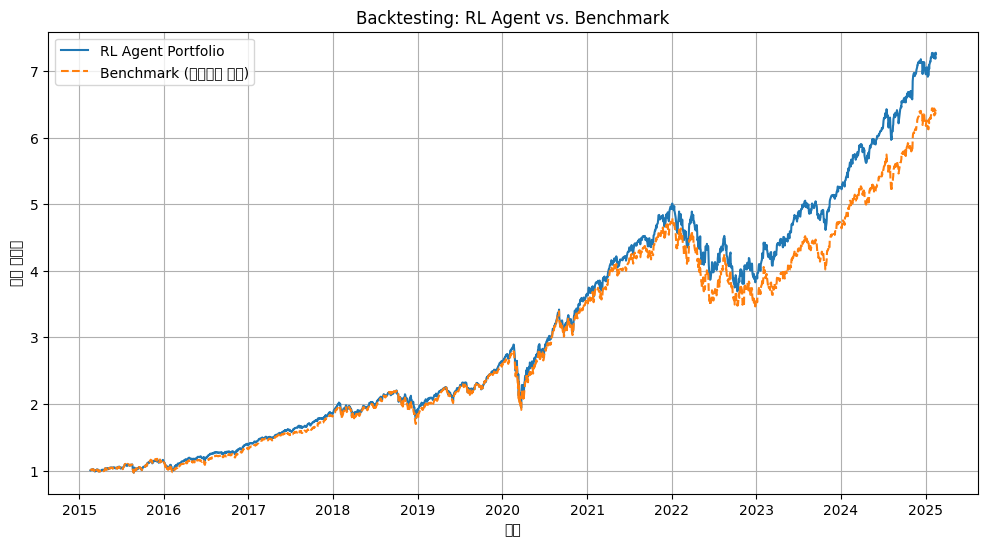

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import gym
from gym import spaces
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

##############################################
# 1. 데이터 다운로드 및 전처리
##############################################
# S&P500 상위 20종목 (예시 티커)
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "NVDA", "BRK-B",
           "JNJ", "UNH", "V", "MA", "HD", "PG", "JPM", "BAC", "VZ", "DIS", "PFE", "XOM"]

# 10년 전부터 오늘까지의 데이터
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.datetime.now() - datetime.timedelta(days=365*10)).strftime('%Y-%m-%d')

# yfinance로 Adjusted Close 데이터 다운로드
data = yf.download(tickers, start=start_date, end=end_date)["Close"]
data.dropna(inplace=True)  # 결측치 제거

# 일별 수익률 계산
returns_df = data.pct_change().dropna()

##############################################
# 2. 벤치마크: 시가총액 비중 배분 계산
##############################################
market_caps = []
for ticker in tickers:
    try:
        info = yf.Ticker(ticker).info
        cap = info.get("marketCap", None)
        # marketCap 정보가 없으면 임의의 값 할당
        if cap is None:
            cap = 1e9
        market_caps.append(cap)
    except Exception as e:
        market_caps.append(1e9)

market_caps = np.array(market_caps)
benchmark_weights = market_caps / market_caps.sum()
print("Benchmark weights (시가총액 비중):")
print(dict(zip(tickers, np.round(benchmark_weights, 4))))

# 벤치마크의 일별 수익률 = 각 종목의 수익률에 시가총액 비중 곱한 값의 합산
benchmark_daily_returns = returns_df.dot(benchmark_weights)

##############################################
# 3. 환경(Environment) 정의: HistoricalPortfolioEnv
##############################################
class HistoricalPortfolioEnv(gym.Env):
    """
    과거 일별 수익률 데이터를 순차적으로 제공하는 환경.
    - 상태(state): 해당일의 각 종목 수익률 (vector)
    - 행동(action): 각 종목에 할당할 투자비중 (합=1)
    - 보상(reward): 선택한 투자비중과 실제 수익률의 내적 (포트폴리오 당일 수익률)
    """
    def __init__(self, returns):
        super(HistoricalPortfolioEnv, self).__init__()
        self.returns = returns  # numpy array, shape=(T, n_assets)
        self.n_assets = returns.shape[1]
        self.current_step = 0
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.n_assets,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self.returns[self.current_step]

    def step(self, action):
        # 행동값 정규화 (합=1)
        weights = action / (np.sum(action) + 1e-8)
        current_return = self.returns[self.current_step]
        reward = np.dot(weights, current_return)
        self.current_step += 1
        done = self.current_step >= len(self.returns)
        if not done:
            next_state = self.returns[self.current_step]
        else:
            next_state = np.zeros(self.n_assets)
        return next_state, reward, done, {}

# numpy array로 변환
returns_np = returns_df.values
env = HistoricalPortfolioEnv(returns_np)
n_assets = env.n_assets

##############################################
# 4. Actor-Critic 모델 정의 (PyTorch)
##############################################
class ActorCritic(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ActorCritic, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Actor: Dirichlet 분포의 알파 파라미터 출력 (양수여야 하므로 softplus 후 +1)
        self.actor = nn.Linear(hidden_dim, output_dim)
        self.critic = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        actor_logits = self.actor(x)
        value = self.critic(x)
        return actor_logits, value

input_dim = n_assets
hidden_dim = 64
output_dim = n_assets

model = ActorCritic(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
gamma = 0.99

##############################################
# 5. 학습 (Training) - Actor-Critic 방식
##############################################
num_episodes = 50  # 에피소드 수 (데모 목적)

for episode in range(num_episodes):
    state = env.reset()
    log_probs = []
    values = []
    rewards = []
    done = False

    while not done:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)  # [1, n_assets]
        logits, value = model(state_tensor)
        # Dirichlet 분포를 위한 알파 파라미터
        alpha = F.softplus(logits) + 1.0
        dist = torch.distributions.Dirichlet(alpha.view(-1))
        action = dist.sample()
        log_prob = dist.log_prob(action)
        next_state, reward, done, _ = env.step(action.detach().numpy())

        log_probs.append(log_prob)
        values.append(value.squeeze(0))
        rewards.append(reward)
        state = next_state

    # 에피소드별 누적수익률 (Return) 계산 (감가율 적용)
    returns_episode = []
    R = 0
    for r in rewards[::-1]:
        R = r + gamma * R
        returns_episode.insert(0, R)
    returns_episode = torch.tensor(returns_episode, dtype=torch.float32)
    values = torch.stack(values)
    log_probs = torch.stack(log_probs)

    advantages = returns_episode - values.detach()
    actor_loss = -(log_probs * advantages).mean()
    critic_loss = F.mse_loss(values, returns_episode)
    loss = actor_loss + critic_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if episode % 10 == 0:
        total_reward = sum(rewards)
        print(f"Episode {episode:3d} | Loss: {loss.item():.4f} | Total Reward: {total_reward:.4f}")

print("학습 완료")

##############################################
# 6. 백테스팅 (Backtesting)
##############################################
# 학습된 모델로 전체 기간에 대해 포트폴리오 수익률 산출
env_bt = HistoricalPortfolioEnv(returns_np)
state = env_bt.reset()
agent_daily_returns = []

while True:
    state_tensor = torch.FloatTensor(state).unsqueeze(0)
    with torch.no_grad():
        logits, _ = model(state_tensor)
        alpha = F.softplus(logits) + 1.0
        dist = torch.distributions.Dirichlet(alpha.view(-1))
        # 백테스트에서는 분포의 평균(즉, 결정론적 정책) 사용
        weights = dist.mean
    next_state, reward, done, _ = env_bt.step(weights.numpy())
    agent_daily_returns.append(reward)
    if done:
        break
    state = next_state

agent_daily_returns = np.array(agent_daily_returns)
agent_cumulative = np.cumprod(1 + agent_daily_returns)  # 초기 투자금 1 기준 누적수익률

# 벤치마크 누적 수익률 (데이터 길이 맞추기)
benchmark_daily = benchmark_daily_returns.values[-len(agent_daily_returns):]
benchmark_cumulative = np.cumprod(1 + benchmark_daily)

# 백테스트 기간의 날짜 (returns_df의 index 사용)
dates = returns_df.index[-len(agent_daily_returns):]

##############################################
# 7. 결과 Plot: RL 에이전트 vs. Benchmark
##############################################
plt.figure(figsize=(12,6))
plt.plot(dates, agent_cumulative, label="RL Agent Portfolio")
plt.plot(dates, benchmark_cumulative, label="Benchmark (시가총액 비중)", linestyle="--")
plt.xlabel("날짜")
plt.ylabel("누적 수익률")
plt.title("Backtesting: RL Agent vs. Benchmark")
plt.legend()
plt.grid(True)
plt.show()

위 코드를 DQN만 사용하도록 변경했을 때:


[*********************100%***********************]  20 of 20 completed


Benchmark weights (시가총액 비중):
AAPL: 0.1543
MSFT: 0.1275
AMZN: 0.1018
GOOGL: 0.0952
META: 0.0784
TSLA: 0.0481
NVDA: 0.1428
BRK-B: 0.0434
JNJ: 0.0158
UNH: 0.0202
V: 0.0287
MA: 0.0216
HD: 0.0171
PG: 0.0160
JPM: 0.0325
BAC: 0.0150
VZ: 0.0072
DIS: 0.0084
PFE: 0.0061
XOM: 0.0198

후보 포트폴리오 예시:
Action 0: [0.1543 0.1275 0.1018 0.0952 0.0784 0.0481 0.1428 0.0434 0.0158 0.0202
 0.0287 0.0216 0.0171 0.016  0.0325 0.015  0.0072 0.0084 0.0061 0.0198]
Action 1: [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
Action 2: [0.1766 0.1459 0.1165 0.109  0.0598 0.0367 0.1634 0.0331 0.012  0.0154
 0.0219 0.0165 0.013  0.0122 0.0248 0.0115 0.0055 0.0064 0.0046 0.0151]
Action 3: [0.1504 0.1243 0.0992 0.0928 0.0764 0.0468 0.1392 0.0423 0.0231 0.0197
 0.0279 0.0211 0.0166 0.0156 0.0317 0.0219 0.0106 0.0122 0.0089 0.0193]
Episode   1 | Total Reward: 2.0729 | Epsilon: 0.995
Episode   2 | Total Reward: 2.1976 | Epsilon: 0.990
Episode   3 | Total Reward: 2.0309 | 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

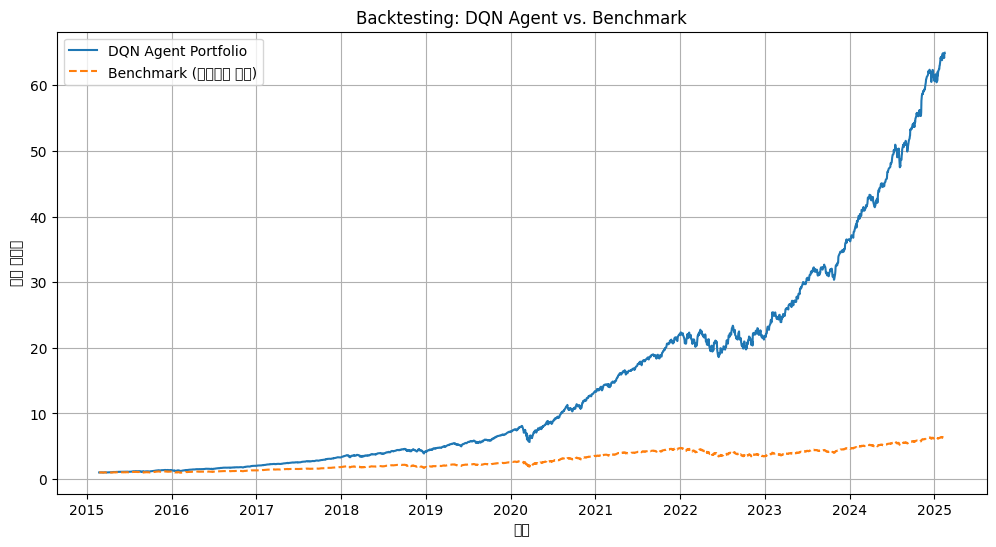

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import gym
from gym import spaces
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

##############################################
# 1. 데이터 다운로드 및 전처리
##############################################
# S&P500 상위 20종목 (예시 티커)
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "NVDA", "BRK-B",
           "JNJ", "UNH", "V", "MA", "HD", "PG", "JPM", "BAC", "VZ", "DIS", "PFE", "XOM"]

# 10년 전부터 오늘까지의 데이터
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.datetime.now() - datetime.timedelta(days=365*10)).strftime('%Y-%m-%d')

# yfinance로 Adjusted Close 데이터 다운로드
data = yf.download(tickers, start=start_date, end=end_date)["Close"]
data.dropna(inplace=True)  # 결측치 제거

# 일별 수익률 계산
returns_df = data.pct_change().dropna()

##############################################
# 2. 벤치마크: 시가총액 비중 배분 계산
##############################################
market_caps = []
for ticker in tickers:
    try:
        info = yf.Ticker(ticker).info
        cap = info.get("marketCap", None)
        if cap is None:
            cap = 1e9
        market_caps.append(cap)
    except Exception as e:
        market_caps.append(1e9)

market_caps = np.array(market_caps)
benchmark_weights = market_caps / market_caps.sum()
print("Benchmark weights (시가총액 비중):")
for t, w in zip(tickers, benchmark_weights):
    print(f"{t}: {w:.4f}")

# 벤치마크의 일별 수익률
benchmark_daily_returns = returns_df.dot(benchmark_weights)

##############################################
# 3. 후보 포트폴리오 (Discrete Action) 정의
##############################################
n_assets = len(tickers)

# Action 0: Benchmark (시가총액 비중)
candidate_0 = benchmark_weights

# Action 1: Equal weight portfolio
candidate_1 = np.ones(n_assets) / n_assets

# Action 2: Aggressive portfolio: 상위 5종목 overweight
def aggressive_portfolio(b_weights):
    weights = b_weights.copy()
    top5_idx = np.argsort(weights)[-5:]
    # 상위 5종목에 1.2배, 나머지에 0.8배
    weights[top5_idx] *= 1.2
    others = [i for i in range(len(weights)) if i not in top5_idx]
    weights[others] *= 0.8
    weights = weights / np.sum(weights)
    return weights

candidate_2 = aggressive_portfolio(benchmark_weights)

# Action 3: Conservative portfolio: 하위 5종목 overweight
def conservative_portfolio(b_weights):
    weights = b_weights.copy()
    bottom5_idx = np.argsort(weights)[:5]
    weights[bottom5_idx] *= 1.2
    others = [i for i in range(len(weights)) if i not in bottom5_idx]
    weights[others] *= 0.8
    weights = weights / np.sum(weights)
    return weights

candidate_3 = conservative_portfolio(benchmark_weights)

# 후보 포트폴리오 리스트
candidate_portfolios = [candidate_0, candidate_1, candidate_2, candidate_3]
n_actions = len(candidate_portfolios)
print("\n후보 포트폴리오 예시:")
for i, cp in enumerate(candidate_portfolios):
    print(f"Action {i}: {np.round(cp,4)}")

##############################################
# 4. 환경(Environment) 정의: Discrete 액션 사용
##############################################
class HistoricalPortfolioEnvDQN(gym.Env):
    """
    과거 일별 수익률 데이터를 순차적으로 제공하는 환경.
    - 상태(state): 해당일의 각 종목 수익률 (shape: [n_assets])
    - 행동(action): 0~(n_actions-1) 중 하나, 각 행동은 사전 정의된 포트폴리오 배분을 의미
    - 보상(reward): 선택한 포트폴리오에 따른 당일 수익률 (내적 연산)
    """
    def __init__(self, returns):
        super(HistoricalPortfolioEnvDQN, self).__init__()
        self.returns = returns  # numpy array, shape=(T, n_assets)
        self.n_assets = returns.shape[1]
        self.current_step = 0
        self.action_space = spaces.Discrete(n_actions)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.n_assets,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self.returns[self.current_step]

    def step(self, action):
        # 선택한 액션에 해당하는 포트폴리오 배분
        weights = candidate_portfolios[action]
        current_return = self.returns[self.current_step]
        reward = np.dot(weights, current_return)
        self.current_step += 1
        done = self.current_step >= len(self.returns)
        if not done:
            next_state = self.returns[self.current_step]
        else:
            next_state = np.zeros(self.n_assets)
        return next_state, reward, done, {}

# numpy array로 변환
returns_np = returns_df.values
env = HistoricalPortfolioEnvDQN(returns_np)

##############################################
# 5. Experience Replay Buffer 구현
##############################################
class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = map(np.stack, zip(*batch))
        return state, action, reward, next_state, done

    def __len__(self):
        return len(self.buffer)

##############################################
# 6. Q-Network 및 Target Network 정의 (PyTorch)
##############################################
class QNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

input_dim = env.observation_space.shape[0]  # n_assets
hidden_dim = 64
output_dim = n_actions

q_network = QNetwork(input_dim, hidden_dim, output_dim)
target_network = QNetwork(input_dim, hidden_dim, output_dim)
target_network.load_state_dict(q_network.state_dict())

optimizer = optim.Adam(q_network.parameters(), lr=1e-3)

##############################################
# 7. DQN 학습 파라미터 설정
##############################################
num_episodes = 50       # 에피소드 수 (데모 목적)
max_steps = len(returns_np)  # 각 에피소드는 전체 기간 사용
batch_size = 64
gamma = 0.99

epsilon = 1.0           # 탐험률 초기값
epsilon_decay = 0.995
min_epsilon = 0.01

target_update_freq = 100  # 몇 스텝마다 타깃 네트워크 업데이트할지
replay_buffer_capacity = 10000
replay_buffer = ReplayBuffer(replay_buffer_capacity)

steps_done = 0

##############################################
# 8. DQN 학습 (Experience Replay + Target Network)
##############################################
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        # ε-greedy policy
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                q_values = q_network(state_tensor)
            action = q_values.argmax().item()

        next_state, reward, done, _ = env.step(action)
        total_reward += reward

        # 저장
        replay_buffer.push(state, action, reward, next_state, done)
        state = next_state
        steps_done += 1

        # 미니배치 샘플링 및 네트워크 업데이트
        if len(replay_buffer) >= batch_size:
            states_b, actions_b, rewards_b, next_states_b, dones_b = replay_buffer.sample(batch_size)

            states_b = torch.FloatTensor(states_b)
            actions_b = torch.LongTensor(actions_b).unsqueeze(1)  # (batch, 1)
            rewards_b = torch.FloatTensor(rewards_b)
            next_states_b = torch.FloatTensor(next_states_b)
            dones_b = torch.FloatTensor(dones_b)

            # 현재 Q값: q_network(state)에서 선택한 행동의 Q값
            q_values = q_network(states_b).gather(1, actions_b).squeeze(1)
            # 다음 상태의 최대 Q값 (타깃 네트워크 사용)
            with torch.no_grad():
                next_q_values = target_network(next_states_b).max(1)[0]
            # TD target
            target = rewards_b + gamma * next_q_values * (1 - dones_b)

            loss = F.mse_loss(q_values, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # 타깃 네트워크 주기적 업데이트
        if steps_done % target_update_freq == 0:
            target_network.load_state_dict(q_network.state_dict())

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    print(f"Episode {episode+1:3d} | Total Reward: {total_reward:.4f} | Epsilon: {epsilon:.3f}")

print("학습 완료")

##############################################
# 9. 백테스팅 (Backtesting)
##############################################
# 학습된 Q-Network을 사용하여 전체 기간 동안 행동 선택 (greedy)
env_bt = HistoricalPortfolioEnvDQN(returns_np)
state = env_bt.reset()
agent_daily_returns = []

while True:
    state_tensor = torch.FloatTensor(state).unsqueeze(0)
    with torch.no_grad():
        q_values = q_network(state_tensor)
    action = q_values.argmax().item()  # 탐욕적 선택
    next_state, reward, done, _ = env_bt.step(action)
    agent_daily_returns.append(reward)
    if done:
        break
    state = next_state

agent_daily_returns = np.array(agent_daily_returns)
agent_cumulative = np.cumprod(1 + agent_daily_returns)

# 벤치마크 누적 수익률 (백테스트 기간 길이에 맞게)
benchmark_daily = benchmark_daily_returns.values[-len(agent_daily_returns):]
benchmark_cumulative = np.cumprod(1 + benchmark_daily)

dates = returns_df.index[-len(agent_daily_returns):]

##############################################
# 10. 결과 Plot: DQN Agent vs. Benchmark
##############################################
plt.figure(figsize=(12,6))
plt.plot(dates, agent_cumulative, label="DQN Agent Portfolio")
plt.plot(dates, benchmark_cumulative, label="Benchmark (시가총액 비중)", linestyle="--")
plt.xlabel("날짜")
plt.ylabel("누적 수익률")
plt.title("Backtesting: DQN Agent vs. Benchmark")
plt.legend()
plt.grid(True)
plt.show()